# Order Delivery Time Prediction

## Objectives
The objective of this assignment is to build a regression model that predicts the delivery time for orders placed through Porter. The model will use various features such as the items ordered, the restaurant location, the order protocol, and the availability of delivery partners.

The key goals are:
- Predict the delivery time for an order based on multiple input features
- Improve delivery time predictions to optimiae operational efficiency
- Understand the key factors influencing delivery time to enhance the model's accuracy

## Data Pipeline
The data pipeline for this assignment will involve the following steps:
1. **Data Loading**
2. **Data Preprocessing and Feature Engineering**
3. **Exploratory Data Analysis**
4. **Model Building**
5. **Model Inference**

## Data Understanding
The dataset contains information on orders placed through Porter, with the following columns:

| Field                     | Description                                                                                 |
|---------------------------|---------------------------------------------------------------------------------------------|
| market_id                 | Integer ID representing the market where the restaurant is located.                         |
| created_at                | Timestamp when the order was placed.                                                        |
| actual_delivery_time      | Timestamp when the order was delivered.                                                     |
| store_primary_category    | Category of the restaurant (e.g., fast food, dine-in).                                      |
| order_protocol            | Integer representing how the order was placed (e.g., via Porter, call to restaurant, etc.). |
| total_items               | Total number of items in the order.                                                         |
| subtotal                  | Final price of the order.                                                                   |
| num_distinct_items        | Number of distinct items in the order.                                                      |
| min_item_price            | Price of the cheapest item in the order.                                                    |
| max_item_price            | Price of the most expensive item in the order.                                              |
| total_onshift_dashers     | Number of delivery partners on duty when the order was placed.                              |
| total_busy_dashers        | Number of delivery partners already occupied with other orders.                             |
| total_outstanding_orders  | Number of orders pending fulfillment at the time of the order.                              |
| distance                  | Total distance from the restaurant to the customer.                                         |


## **Importing Necessary Libraries**

In [6]:
# Import essential libraries for data manipulation and analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings('ignore')

## **1. Loading the data**
Load 'porter_data_1.csv' as a DataFrame

In [8]:
# Importing the file porter_data_1.csv
df=pd.read_csv('porter_data_1.csv')
df.head()

market_id           created_at actual_delivery_time  \
0        1.0  2015-02-06 22:24:17  2015-02-06 23:11:17   
1        2.0  2015-02-10 21:49:25  2015-02-10 22:33:25   
2        2.0  2015-02-16 00:11:35  2015-02-16 01:06:35   
3        1.0  2015-02-12 03:36:46  2015-02-12 04:35:46   
4        1.0  2015-01-27 02:12:36  2015-01-27 02:58:36   

   store_primary_category  order_protocol  total_items  subtotal  \
0                       4             1.0            4      3441   
1                      46             2.0            1      1900   
2                      36             3.0            4      4771   
3                      38             1.0            1      1525   
4                      38             1.0            2      3620   

   num_distinct_items  min_item_price  max_item_price  total_onshift_dashers  \
0                   4             557            1239                   33.0   
1                   1            1400            1400                    1.0   
2                   3             820            1604                    8.0   
3                   1            1525            1525                    5.0   
4                   2            1425            2195                    5.0   

   total_busy_dashers  total_outstanding_orders  distance  
0                14.0                      21.0     34.44  
1                 2.0                       2.0     27.60  
2                 6.0                      18.0     11.56  
3                 6.0                       8.0     31.80  
4                 5.0                       7.0      8.20

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 175777 non-null  float64
 1   created_at                175777 non-null  object 
 2   actual_delivery_time      175777 non-null  object 
 3   store_primary_category    175777 non-null  int64  
 4   order_protocol            175777 non-null  float64
 5   total_items               175777 non-null  int64  
 6   subtotal                  175777 non-null  int64  
 7   num_distinct_items        175777 non-null  int64  
 8   min_item_price            175777 non-null  int64  
 9   max_item_price            175777 non-null  int64  
 10  total_onshift_dashers     175777 non-null  float64
 11  total_busy_dashers        175777 non-null  float64
 12  total_outstanding_orders  175777 non-null  float64
 13  distance                  175777 non-null  f

In [10]:
df.isna().sum()

market_id                   0
created_at                  0
actual_delivery_time        0
store_primary_category      0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_dashers       0
total_busy_dashers          0
total_outstanding_orders    0
distance                    0
dtype: int64

## **2. Data Preprocessing and Feature Engineering** <font color = red>[15 marks]</font> <br>

#### **2.1 Fixing the Datatypes**  <font color = red>[5 marks]</font> <br>
The current timestamps are in object format and need conversion to datetime format for easier handling and intended functionality

##### **2.1.1** <font color = red>[2 marks]</font> <br>
Convert date and time fields to appropriate data type

In [14]:
# Convert 'created_at' and 'actual_delivery_time' columns to datetime format
#Change datetime obejct to df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['created_at'] = pd.to_datetime(df['created_at'])
df.info()
#Since we have created date and delivery time, lets create few derived columns
df["TimeTakenForDelivery"] =  df["actual_delivery_time"]- df["created_at"] 
df["TimeTakenForDelivery"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   market_id                 175777 non-null  float64       
 1   created_at                175777 non-null  datetime64[ns]
 2   actual_delivery_time      175777 non-null  datetime64[ns]
 3   store_primary_category    175777 non-null  int64         
 4   order_protocol            175777 non-null  float64       
 5   total_items               175777 non-null  int64         
 6   subtotal                  175777 non-null  int64         
 7   num_distinct_items        175777 non-null  int64         
 8   min_item_price            175777 non-null  int64         
 9   max_item_price            175777 non-null  int64         
 10  total_onshift_dashers     175777 non-null  float64       
 11  total_busy_dashers        175777 non-null  float64       
 12  to

0        0 days 00:47:00
1        0 days 00:44:00
2        0 days 00:55:00
3        0 days 00:59:00
4        0 days 00:46:00
               ...      
175772   0 days 00:43:00
175773   0 days 01:02:00
175774   0 days 00:46:00
175775   0 days 00:45:00
175776   0 days 00:37:00
Name: TimeTakenForDelivery, Length: 175777, dtype: timedelta64[ns]

##### **2.1.2**  <font color = red>[3 marks]</font> <br>
Convert categorical fields to appropriate data type

In [16]:
# Convert categorical features to category type

categorical_columns = ['store_primary_category', 'order_protocol', 'market_id']
df[categorical_columns] = df[categorical_columns].astype('category')

#### **2.2 Feature Engineering** <font color = red>[5 marks]</font> <br>
Calculate the time taken to execute the delivery as well as extract the hour and day at which the order was placed

##### **2.2.1** <font color = red>[2 marks]</font> <br>
Calculate the time taken using the features `actual_delivery_time` and `created_at`

In [19]:
# Calculate time taken in minutes

df["TimeTakenForDelivery"] = (df["actual_delivery_time"] - df["created_at"]).dt.total_seconds() / 60
df['TimeTakenForDelivery'].describe() 

count    175777.000000
mean         46.203013
std           9.327424
min          32.000000
25%          39.000000
50%          45.000000
75%          52.000000
max         110.000000
Name: TimeTakenForDelivery, dtype: float64

##### **2.2.2** <font color = red>[3 marks]</font> <br>
Extract the hour at which the order was placed and which day of the week it was. Drop the unnecessary columns.

In [21]:
# Extract the hour and day of week from the 'created_at' timestamp
df["HourOfDay"] = df["created_at"].dt.hour
df["DayOfWeek"] = df["created_at"].dt.dayofweek
df["month"]   = df["created_at"].dt.month
df["week"] = df["created_at"].dt.isocalendar().week
df["year"]  = df["created_at"].dt.year

# Create a categorical feature 'isWeekend' : Done in below because I wanted to see if above columns by head

In [22]:
df.head()
# Create a categorical feature 'isWeekend'
df["isWeekend"] = df["DayOfWeek"].isin([5, 6]).astype("category")  # 1 for Weekend, 0 for Weekday

In [23]:
df.dtypes

market_id                         category
created_at                  datetime64[ns]
actual_delivery_time        datetime64[ns]
store_primary_category            category
order_protocol                    category
total_items                          int64
subtotal                             int64
num_distinct_items                   int64
min_item_price                       int64
max_item_price                       int64
total_onshift_dashers              float64
total_busy_dashers                 float64
total_outstanding_orders           float64
distance                           float64
TimeTakenForDelivery               float64
HourOfDay                            int32
DayOfWeek                            int32
month                                int32
week                                UInt32
year                                 int32
isWeekend                         category
dtype: object

In [24]:
# Drop unnecessary columns
drop_cols = ["created_at", "actual_delivery_time"]  #Already taken the columns out of them
df.drop(columns=drop_cols, inplace=True)

#### **2.3 Creating training and validation sets** <font color = red>[5 marks]</font> <br>

##### **2.3.1** <font color = red>[2 marks]</font> <br>
 Define target and input features

In [27]:
# Define target variable (y) and features (X)

# feature_cols = ["total_items", "num_distinct_items", "subtotal", "min_item_price", 
#                 "max_item_price", "total_onshift_dashers", "total_busy_dashers", 
#                 "total_outstanding_orders", "distance", "HourOfDay", "DayOfWeek", "isWeekend"]

feature_cols = [x for x in df.columns if x!= 'TimeTakenForDelivery']
# X = pd.get_dummies(df[feature_cols], drop_first=True)  
x = df[feature_cols]
y = df["TimeTakenForDelivery"]

##### **2.3.2** <font color = red>[3 marks]</font> <br>
 Split the data into training and test sets

In [29]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## **3. Exploratory Data Analysis on Training Data** <font color = red>[20 marks]</font> <br>
1. Analyzing the correlation between variables to identify patterns and relationships
2. Identifying and addressing outliers to ensure the integrity of the analysis
3. Exploring the relationships between variables and examining the distribution of the data for better insights

#### **3.1 Feature Distributions** <font color = red> [7 marks]</font> <br>


In [32]:
# Define numerical and categorical columns for easy EDA and data manipulation
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)


Numerical Columns: ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'TimeTakenForDelivery']
Categorical Columns: ['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


##### **3.1.1** <font color = red>[3 marks]</font> <br>
Plot distributions for numerical columns in the training set to understand their spread and any skewness

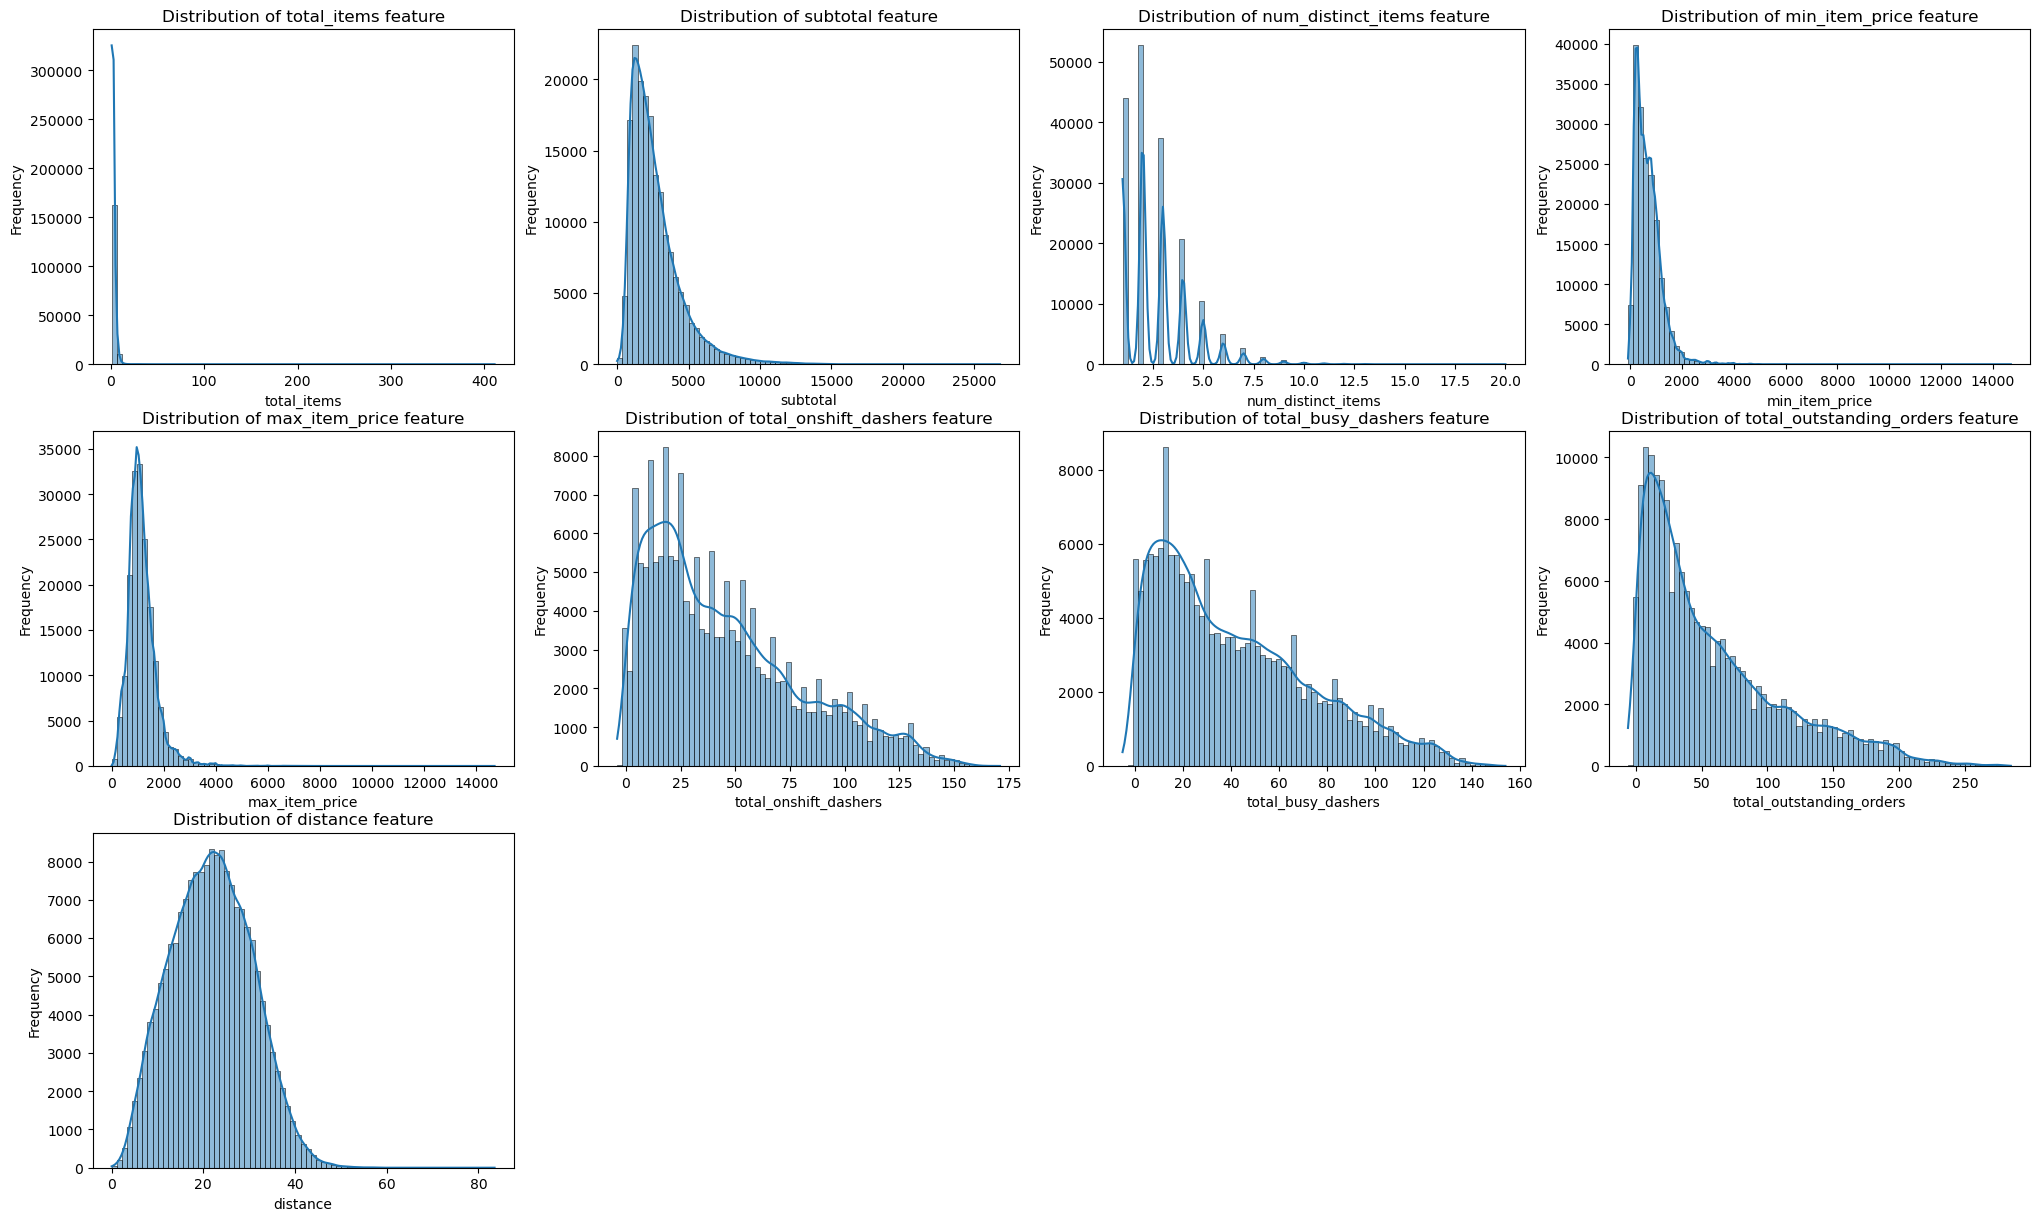

In [34]:
# Scatter plot to visualise the relationship between time_taken and other features
numerical_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# numerical_features = [col for col in numerical_features if col not in ['market_id', 'created_at', 'actual_delivery_time']]


plt.figure(figsize=(25, 20))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  
    sns.histplot(df[col], bins=75, kde=True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col} feature")
plt.show()


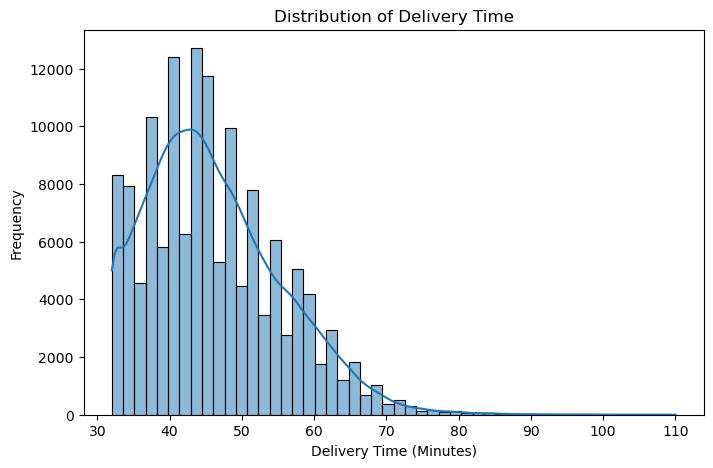

In [35]:
plt.figure(figsize=(8, 5))
sns.histplot(y_train, bins=50, kde=True)
plt.xlabel("Delivery Time (Minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Delivery Time")
plt.show()

The above distribution is a **right skewed** distribution

##### **3.1.2** <font color = red>[2 marks]</font> <br>
Check the distribution of categorical features

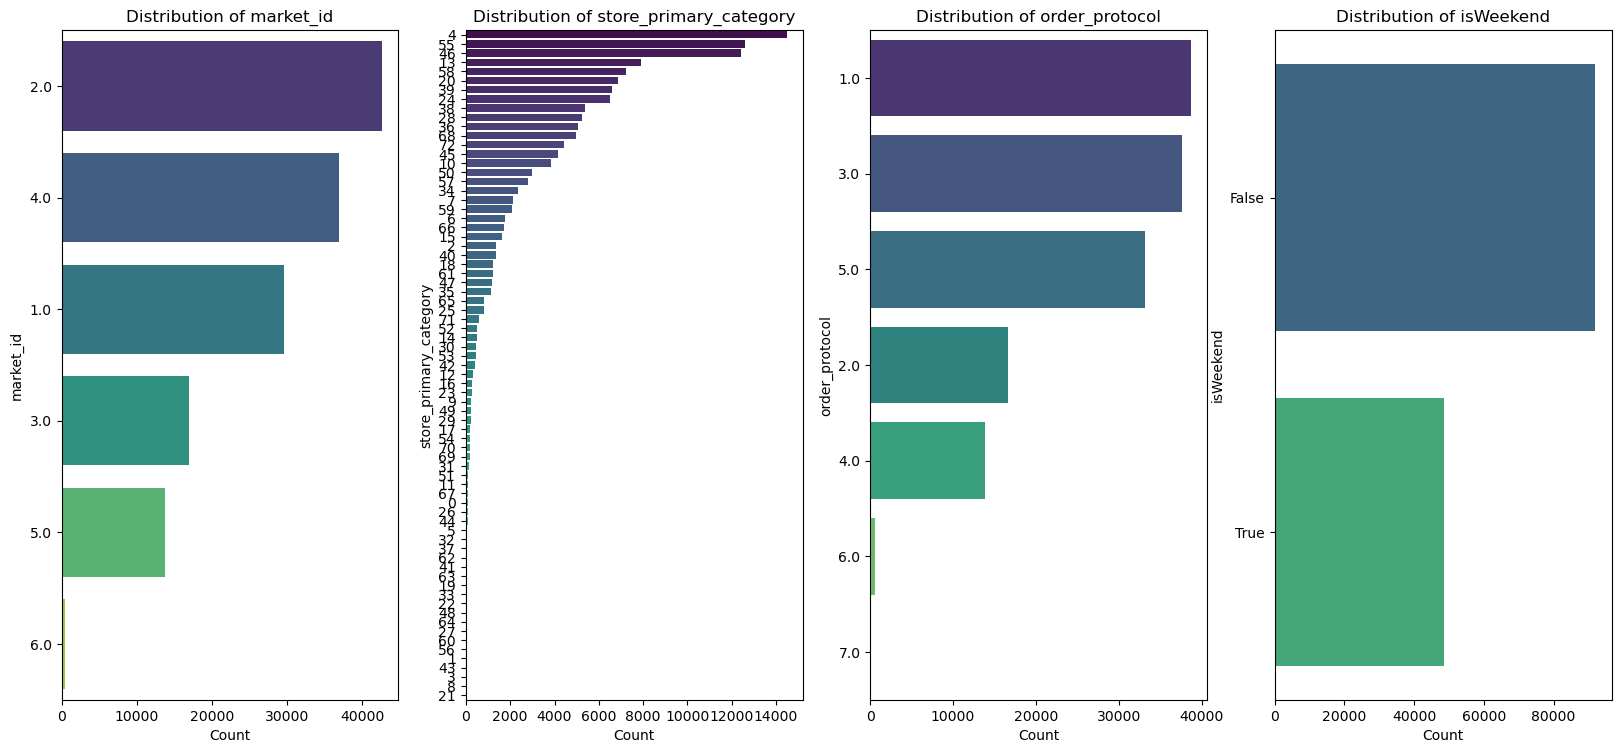

In [38]:
# Distribution of categorical columns
categorical_cols = x_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Seems I unnecessarily created year, since all are from same year.
# Set figure size
plt.figure(figsize=(20, 40))


for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 4, i) 
    sns.countplot(y=x_train[col], order=x_train[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.show()


##### **3.1.3** <font color = red>[2 mark]</font> <br>
Visualise the distribution of the target variable to understand its spread and any skewness

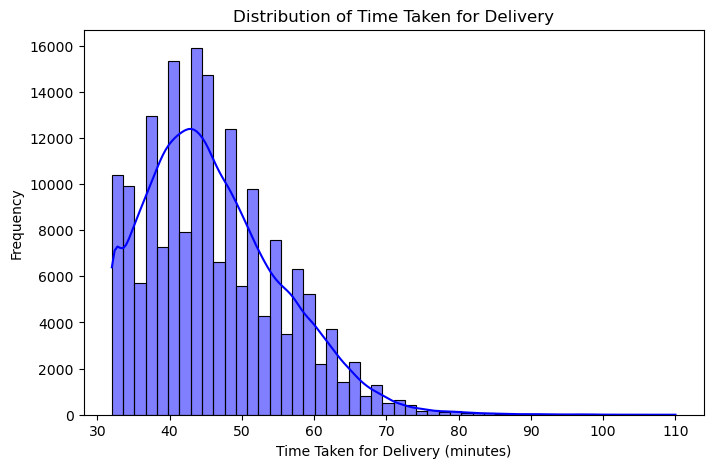

In [40]:
# Distribution of time_taken
plt.figure(figsize=(8, 5))


sns.histplot(df["TimeTakenForDelivery"], bins=50, kde=True, color='blue')


plt.xlabel("Time Taken for Delivery (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution of Time Taken for Delivery")

# Show the plot
plt.show()


This is a **right skewed** distribution

#### **3.2 Relationships Between Features** <font color = red>[3 marks]</font> <br>

##### **3.2.1** <font color = red>[3 marks]</font> <br>
Scatter plots for important numerical and categorical features to observe how they relate to `time_taken`

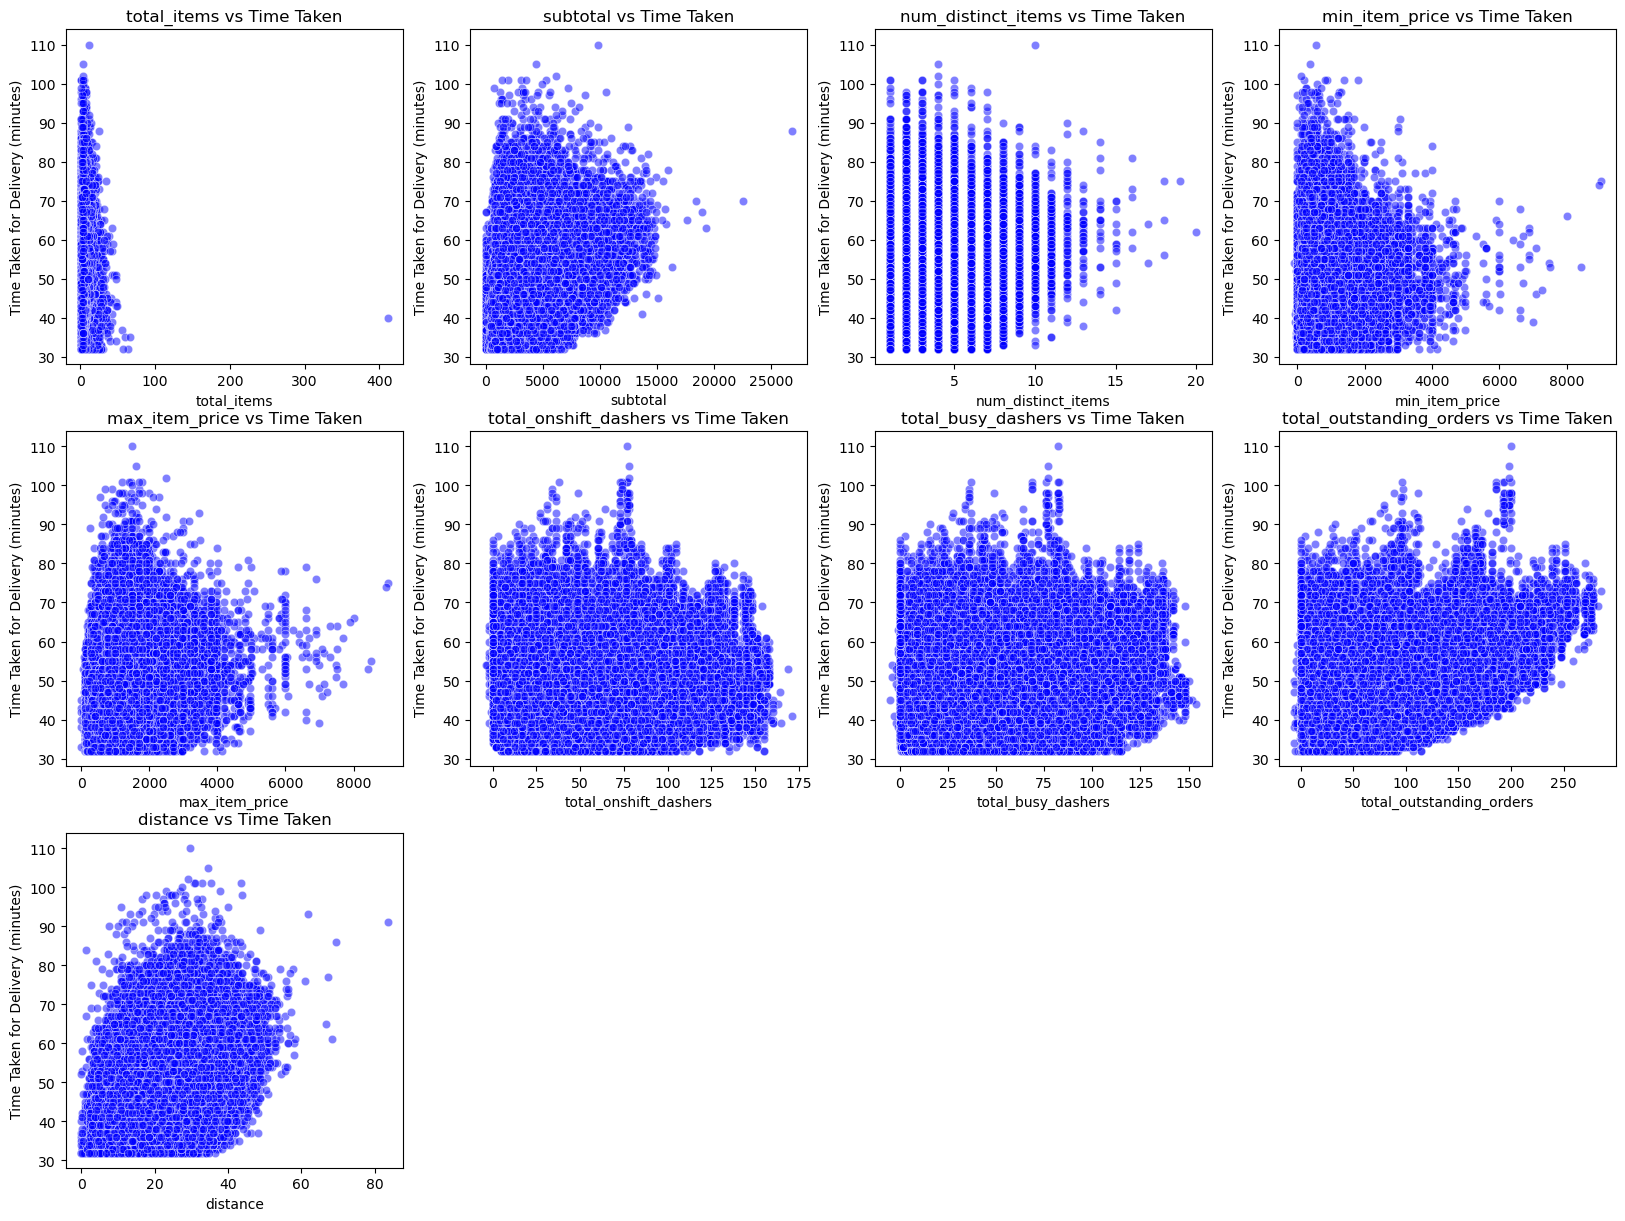

In [44]:
# Scatter plot to visualise the relationship between time_taken and other features
numerical_features = x_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_features = [col for col in numerical_features if col not in ['market_id', 'created_at', 'actual_delivery_time']]


plt.figure(figsize=(20, 20))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)  
    sns.scatterplot(x=x_train[col], y=y_train, alpha=0.5, color='blue')
    plt.xlabel(col)
    plt.ylabel("Time Taken for Delivery (minutes)")
    plt.title(f"{col} vs Time Taken")

plt.show()


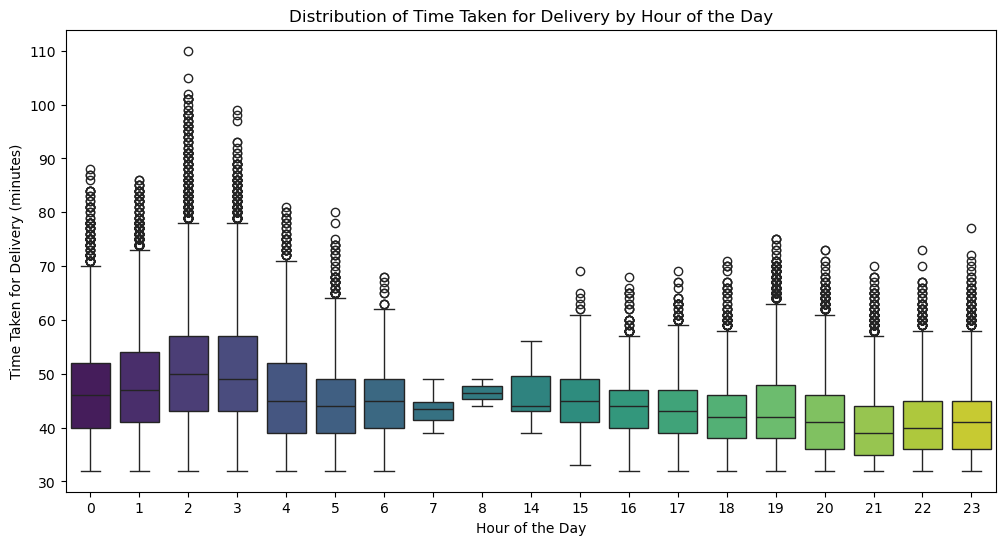

In [45]:
# Show the distribution of time_taken for different hours

plt.figure(figsize=(12, 6))
sns.boxplot(x=x_train["HourOfDay"], y=y_train, palette="viridis")

plt.xlabel("Hour of the Day")
plt.ylabel("Time Taken for Delivery (minutes)")
plt.title("Distribution of Time Taken for Delivery by Hour of the Day")

plt.show()

#### **3.3 Correlation Analysis** <font color = red>[5 marks]</font> <br>
Check correlations between numerical features to identify which variables are strongly related to `time_taken`

##### **3.3.1** <font color = red>[3 marks]</font> <br>
Plot a heatmap to display correlations

In [48]:
train_concat = pd.concat([x_train, y_train], axis=1)

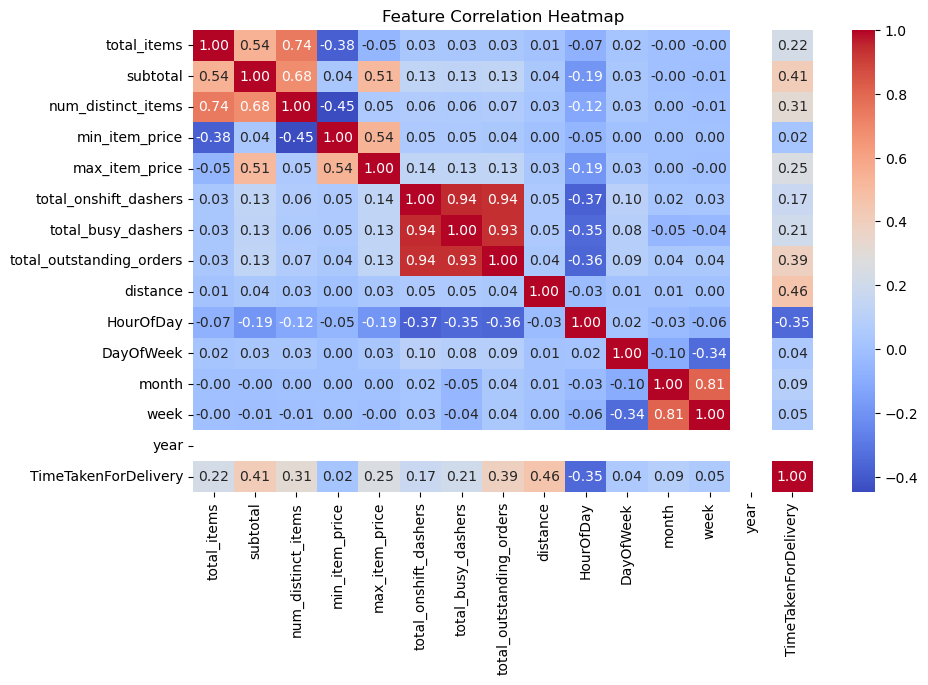

In [49]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_concat.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

##### **3.3.2** <font color = red>[2 marks]</font> <br>
Drop the columns with weak correlations with the target variable

In [51]:
x_train = x_train.drop(['year', 'month', 'week', 'min_item_price'], axis=1)

In [52]:
# Drop 3-5 weakly correlated columns from training dataset
# min_item_price, market_id, store_primary_category DayOfWeek, Week ## WILL COME BACK TO THIS AFTER EXPERIMENT TODO
# df = df.drop('year', axis=1)
# df_copy=df
# df=df.drop('store_primary_category',axis=1)

#### **3.4 Handling the Outliers** <font color = red>[5 marks]</font> <br>



##### **3.4.1** <font color = red>[2 marks]</font> <br>
Visualise potential outliers for the target variable and other numerical features using boxplots

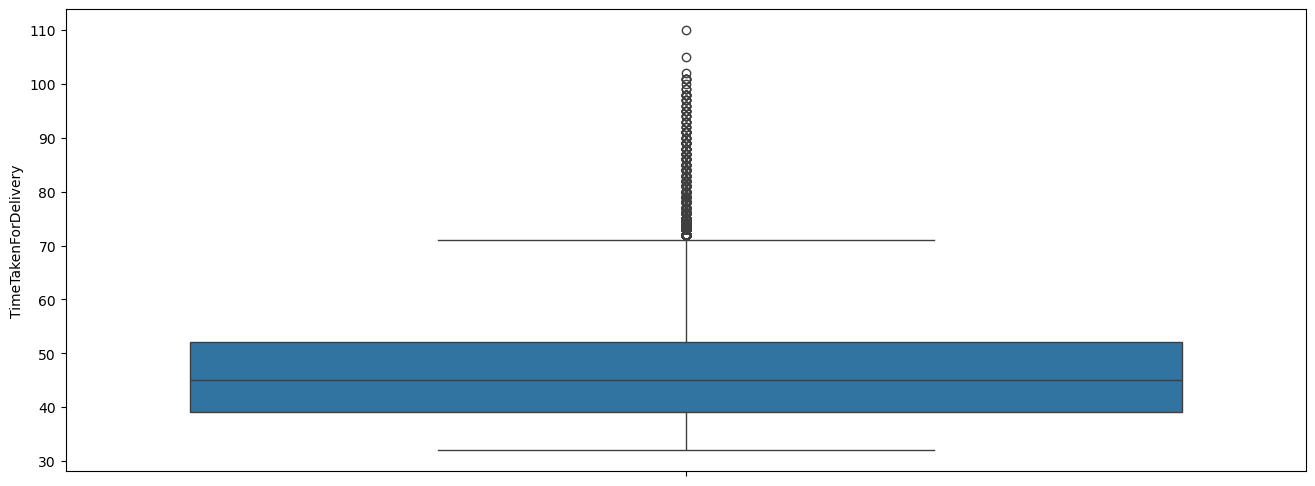

In [55]:
# Boxplot for time_taken
plt.figure(figsize=(16,6))
sns.boxplot(data=y_train)
plt.show()

##### **3.4.2** <font color = red>[3 marks]</font> <br>
Handle outliers present in all columns

In [57]:
 # Boxplot for time_taken
x_train_temp=x_train.copy(deep=True)
x_train.describe()
# x_train_temp= x_train['total_items']<80
x_train_temp['total_item_80'] = x_train['total_items']>80

In [58]:
x_train_temp['total_item_80'].value_counts()
# plt.figure(figsize=(16,6))
# sns.boxplot(data=x_train_temp['total_items'])
# plt.show()

total_item_80
False    140620
True          1
Name: count, dtype: int64

In [223]:
x_train

market_id store_primary_category order_protocol  total_items  subtotal  \
102712       2.0                     45            2.0            1       820   
94576        4.0                     20            3.0            1       995   
49784        1.0                     36            3.0            4      2040   
37753        3.0                     39            1.0            2      2376   
91728        2.0                      6            1.0            1      1430   
...          ...                    ...            ...          ...       ...   
119879       2.0                     58            5.0            1      1111   
103694       2.0                     24            1.0            4      2880   
131932       6.0                     46            5.0            2      1799   
146867       5.0                     36            2.0           10      4015   
121958       1.0                     55            3.0            4      4951   

        num_distinct_items  max_item_price  total_onshift_dashers  \
102712                   1             745                   35.0   
94576                    1             995                  110.0   
49784                    4             895                    6.0   
37753                    2            1399                   16.0   
91728                    1            1320                   64.0   
...                    ...             ...                    ...   
119879                   1            1111                   31.0   
103694                   3             795                   95.0   
131932                   2             899                   18.0   
146867                   4             850                   26.0   
121958                   4            1399                   47.0   

        total_busy_dashers  total_outstanding_orders  distance  HourOfDay  \
102712                39.0                      56.0     30.32         21   
94576                 72.0                     116.0     31.16          2   
49784                  3.0                       7.0     18.16         21   
37753                 17.0                      19.0     33.44          3   
91728                 47.0                      52.0     31.56         21   
...                    ...                       ...       ...        ...   
119879                31.0                      34.0     37.04         23   
103694                80.0                     111.0     27.72          3   
131932                18.0                      15.0     21.92          1   
146867                24.0                      28.0     23.60          3   
121958                27.0                      27.0     18.04          3   

        DayOfWeek isWeekend  
102712          1     False  
94576           4     False  
49784           4     False  
37753           1     False  
91728           4     False  
...           ...       ...  
119879          6      True  
103694          2     False  
131932          1     False  
146867          5      True  
121958          0     False  

[140621 rows x 14 columns]

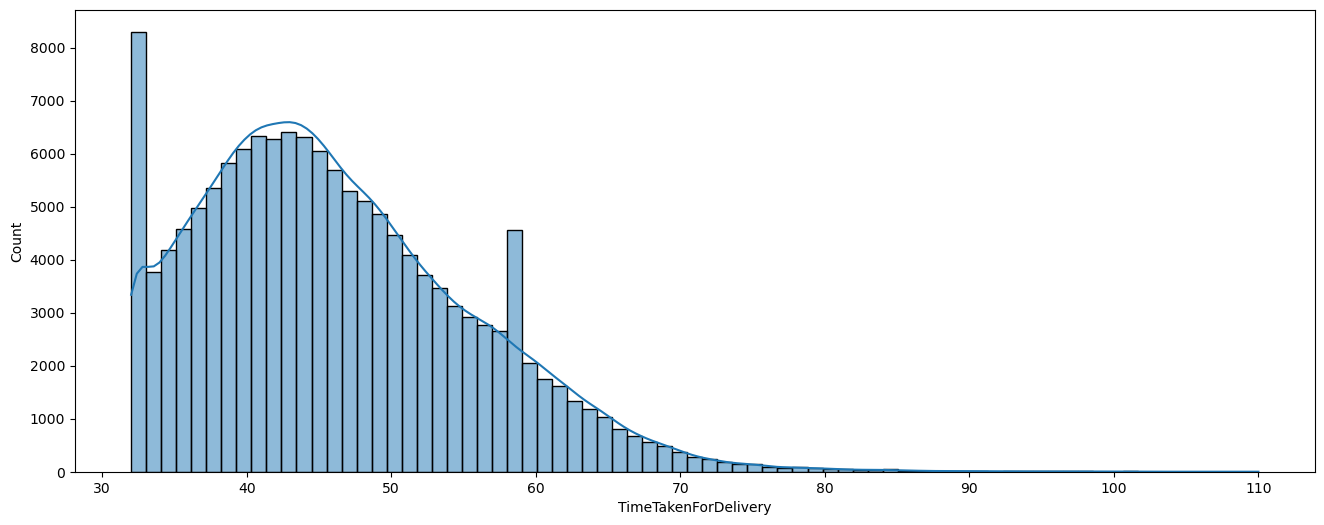

In [59]:
# Handle outliers
plt.figure(figsize=(16,6))
sns.histplot(data=y_train, kde=True, bins=75)
plt.show()
# Its - Right Skewed. If I do log, can work ton better.


## **4. Exploratory Data Analysis on Validation Data** <font color = red>[optional]</font> <br>
Optionally, perform EDA on test data to see if the distribution match with the training data

In [61]:
# Define numerical and categorical columns for easy EDA and data manipulation



#### **4.1 Feature Distributions**


##### **4.1.1**
Plot distributions for numerical columns in the validation set to understand their spread and any skewness

In [64]:
# Plot distributions for all numerical columns



##### **4.1.2**
Check the distribution of categorical features

In [66]:
# Distribution of categorical columns



##### **4.1.3**
Visualise the distribution of the target variable to understand its spread and any skewness

In [68]:
# Distribution of time_taken



#### **4.2 Relationships Between Features**
Scatter plots for numerical features to observe how they relate to each other, especially to `time_taken`

In [70]:
# Scatter plot to visualise the relationship between time_taken and other features



#### **4.3** Drop the columns with weak correlations with the target variable

In [72]:
# Drop the weakly correlated columns from training dataset



## **5. Model Building** <font color = red>[15 marks]</font> <br>

#### **Import Necessary Libraries**

In [75]:
# Import libraries
## needed in section 2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler #This for scaling

#### **5.1 Feature Scaling** <font color = red>[3 marks]</font> <br>

In [77]:
x_train.dtypes

market_id                   category
store_primary_category      category
order_protocol              category
total_items                    int64
subtotal                       int64
num_distinct_items             int64
max_item_price                 int64
total_onshift_dashers        float64
total_busy_dashers           float64
total_outstanding_orders     float64
distance                     float64
HourOfDay                      int32
DayOfWeek                      int32
isWeekend                   category
dtype: object

In [78]:
# Apply scaling to the numerical columns
all_numerical_cols = x_train.select_dtypes(include=["int64", "float64"]).columns.tolist()
all_categorical_cols = x_train.select_dtypes(include=["category"]).columns.tolist()
print(all_numerical_cols)
print(all_categorical_cols)

['total_items', 'subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance']
['market_id', 'store_primary_category', 'order_protocol', 'isWeekend']


Note that linear regression is agnostic to feature scaling. However, with feature scaling, we get the coefficients to be somewhat on the same scale so that it becomes easier to compare them.

In [80]:
x_train_standard = x_train.copy(deep=True)
sc = StandardScaler()
sc.fit(x_train[all_numerical_cols])
x_train_standard = pd.DataFrame(sc.transform(x_train[all_numerical_cols]), columns=all_numerical_cols)

In [81]:
x_train_standard

total_items  subtotal  num_distinct_items  max_item_price  \
0         -0.809858 -1.026257           -1.031025       -0.741388   
1         -0.809858 -0.930670           -1.031025       -0.294713   
2          0.290202 -0.359882            0.813974       -0.473383   
3         -0.443171 -0.176356           -0.416025        0.427112   
4         -0.809858 -0.693069           -1.031025        0.285963   
...             ...       ...                 ...             ...   
140616    -0.809858 -0.867310           -1.031025       -0.087456   
140617     0.290202  0.098933            0.198975       -0.652053   
140618    -0.443171 -0.491518           -0.416025       -0.466236   
140619     2.490323  0.718880            0.813974       -0.553784   
140620     0.290202  1.230132            0.813974        0.427112   

        total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   -0.287165           -0.089448                 -0.042543   
1                    1.882200            0.935472                  1.094392   
2                   -1.125986           -1.207543                 -0.971040   
3                   -0.836737           -0.772728                 -0.743653   
4                    0.551657            0.159017                 -0.118339   
...                       ...                 ...                       ...   
140616              -0.402864           -0.337914                 -0.459419   
140617               1.448327            1.183937                  0.999648   
140618              -0.778887           -0.741670                 -0.819449   
140619              -0.547488           -0.555321                 -0.573113   
140620               0.059934           -0.462146                 -0.592062   

        distance  
0       0.968899  
1       1.064887  
2      -0.420638  
3       1.325425  
4       1.110595  
...          ...  
140616  1.736801  
140617  0.671794  
140618  0.009021  
140619  0.200997  
140620 -0.434351  

[140621 rows x 8 columns]

In [82]:
x_train_category = pd.get_dummies(x_train[[x for x in all_categorical_cols if x!= 'store_primary_category']], drop_first=True)
x_train_category.reset_index(drop=True, inplace=True)
x_train_final = pd.concat([x_train_standard, x_train_category], axis=1)

#### **5.2 Build a linear regression model** <font color = red>[5 marks]</font> <br>

You can choose from the libraries *statsmodels* and *scikit-learn* to build the model.

In [85]:
# # Create/Initialise the model
# ## Y is Delivery time rest all feature to be used in X.
# feature_cols = ["total_items", "num_distinct_items", "subtotal", "min_item_price", 
#                 "max_item_price", "total_onshift_dashers", "total_busy_dashers", 
#                 "total_outstanding_orders", "distance", "HourOfDay", "DayOfWeek", "isWeekend"]
# X = pd.get_dummies(df[feature_cols], drop_first=True)  # One-hot encode 
# y = df["TimeTakenForDelivery"]


In [86]:
# # Train the model using the training data
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [87]:
lr_model = LinearRegression()
lr_model.fit(x_train_final, y_train)

LinearRegression()

In [88]:
x_test_standard = pd.DataFrame(sc.transform(x_test[all_numerical_cols]), columns=all_numerical_cols)
x_test_category = pd.get_dummies(x_test[[x for x in all_categorical_cols if x!= 'store_primary_category']], drop_first=True)
x_test_category.reset_index(drop=True, inplace=True)
x_test_final = pd.concat([x_test_standard, x_test_category], axis=1)

In [89]:
x_train_final.columns

Index(['total_items', 'subtotal', 'num_distinct_items', 'max_item_price',
       'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0', 'market_id_5.0', 'market_id_6.0',
       'order_protocol_2.0', 'order_protocol_3.0', 'order_protocol_4.0',
       'order_protocol_5.0', 'order_protocol_6.0', 'order_protocol_7.0',
       'isWeekend_True'],
      dtype='object')

In [90]:
x_test_final.loc[:, x_train_final.columns]

total_items  subtotal  num_distinct_items  max_item_price  \
0         0.290202 -0.056190            0.813974       -0.108897   
1        -0.076484  0.262796           -0.416025        0.250229   
2        -0.809858 -0.819243           -1.031025        0.069773   
3         0.656889 -0.605676            0.813974       -1.286330   
4         1.023576  0.535900            0.198975       -0.732454   
...            ...       ...                 ...             ...   
35151     0.656889 -0.490972            0.813974       -0.598452   
35152     0.290202  0.348005            0.198975        0.766585   
35153    -0.076484 -0.436351            0.198975        0.250229   
35154    -0.443171 -0.306353           -0.416025        0.673677   
35155     2.857009 -0.614961            1.428974       -1.484653   

       total_onshift_dashers  total_busy_dashers  total_outstanding_orders  \
0                   0.291333            0.314308                  0.146946   
1                   1.621876            1.742984                  2.534510   
2                  -1.097061           -1.114368                 -0.989989   
3                  -1.212760           -1.176485                 -1.027887   
4                  -1.039211           -1.269659                 -1.084734   
...                      ...                 ...                       ...   
35151               1.448327            1.556635                  1.587064   
35152              -0.316089           -0.400030                 -0.478368   
35153              -0.258240           -0.244739                 -0.611011   
35154               0.725206            0.655948                  0.506976   
35155              -0.692113           -0.617437                 -0.516266   

       distance  market_id_2.0  market_id_3.0  market_id_4.0  market_id_5.0  \
0      0.740357          False          False          False          False   
1      0.196426          False          False           True          False   
2     -0.827443          False          False          False           True   
3      0.434110          False          False          False           True   
4     -0.658322          False           True          False          False   
...         ...            ...            ...            ...            ...   
35151  1.037461          False          False           True          False   
35152 -1.234249          False           True          False          False   
35153 -1.567920          False          False          False          False   
35154 -1.151974           True          False          False          False   
35155 -1.138261          False          False          False          False   

       market_id_6.0  order_protocol_2.0  order_protocol_3.0  \
0              False               False               False   
1              False               False                True   
2              False               False               False   
3              False               False               False   
4              False               False               False   
...              ...                 ...                 ...   
35151          False               False                True   
35152          False               False                True   
35153          False               False               False   
35154          False               False                True   
35155          False               False               False   

       order_protocol_4.0  order_protocol_5.0  order_protocol_6.0  \
0                   False               False               False   
1                   False               False               False   
2                   False               False               False   
3                    True               False               False   
4                   False                True               False   
...                   ...                 ...                 ...   
35151               False               False       

In [91]:
# Make predictions
y_pred = lr_model.predict(x_test_final)

In [92]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [93]:
print(f"Mean Absolute Error (MAE): {mae:.2f} min")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} min")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.51 min
Root Mean Squared Error (RMSE): 3.39 min
R² Score: 0.87


Note that we have 12 (depending on how you select features) training features. However, not all of them would be useful. Let's say we want to take the most relevant 8 features.

We will use Recursive Feature Elimination (RFE) here.

For this, you can look at the coefficients / p-values of features from the model summary and perform feature elimination, or you can use the RFE module provided with *scikit-learn*.

In [95]:
# The advice says to use 8, I do have 12 in feature selection, lets change the same. 

In [96]:
from sklearn.feature_selection import RFE 
linear_model_8= LinearRegression()
rfe_selector_8 = RFE(estimator=linear_model_8, n_features_to_select=8, step=1)
rfe_selector_8.fit(x_train_final, y_train)
selected_features = x_train_final.columns[rfe_selector_8.support_]
print("Selected Features:", list(selected_features))

Selected Features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0']


In [97]:
rfe_selector_8.support_

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False])

In [98]:
# Keep only the selected features
X_train_selected = x_train_final[selected_features]
X_val_selected = x_test_final[selected_features]

# Train a Linear Regression model with selected features
final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)

# Predict on validation set
y_pred_selected = final_model.predict(X_val_selected)

# Compute R² score
r2 = r2_score(y_test, y_pred_selected)

# Calculate Adjusted R²
n = X_val_selected.shape[0]  # Number of samples
p = X_val_selected.shape[1]  # Number of features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Print results
print("R² Score:", r2)
print("Adjusted R² Score:", adjusted_r2)

R² Score: 0.8423313550833172
Adjusted R² Score: 0.8422954672647457


#### **5.3 Build the model and fit RFE to select the most important features** <font color = red>[7 marks]</font> <br>

For RFE, we will start with all features and use
the RFE method to recursively reduce the number of features one-by-one.

After analysing the results of these iterations, we select the one that has a good balance between performance and number of features.

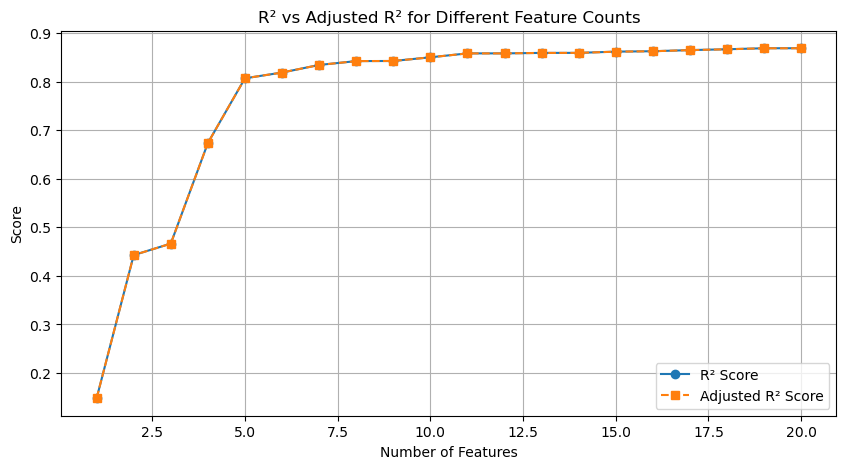

In [101]:
# Loop through the number of features and test the model
r2_scores = []
adjusted_r2_scores = []
feature_counts = range(1, x_train_final.shape[1] + 1)  # Test from 1 to all features

# Loop through different numbers of selected features
for num_features in feature_counts:
    # Apply RFE with num_features
    rfe_selector = RFE(estimator=LinearRegression(), n_features_to_select=num_features, step=1)
    rfe_selector.fit(x_train_final, y_train)

    # Get the selected features
    selected_features = x_train_final.columns[rfe_selector.support_]

    # Subset the data to selected features
    X_train_selected = x_train_final[selected_features]
    X_val_selected = x_test_final[selected_features]

    # Train Linear Regression model
    model = LinearRegression()
    model.fit(X_train_selected, y_train)

    # Predict on validation set
    y_pred = model.predict(X_val_selected)

    # Compute R² score
    r2 = r2_score(y_test, y_pred)

    # Compute Adjusted R² score|
    n = X_val_selected.shape[0]  # Number of observations
    p = X_val_selected.shape[1]  # Number of features
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    # Store scores
    r2_scores.append(r2)
    adjusted_r2_scores.append(adjusted_r2)

# Plot R² and Adjusted R² scores
plt.figure(figsize=(10, 5))
plt.plot(feature_counts, r2_scores, marker='o', label="R² Score")
plt.plot(feature_counts, adjusted_r2_scores, marker='s', label="Adjusted R² Score", linestyle="--")
plt.xlabel("Number of Features")
plt.ylabel("Score")
plt.title("R² vs Adjusted R² for Different Feature Counts")
plt.legend()
plt.grid()
plt.show()


In [102]:
# Build the final model with selected number of features
linear_model = LinearRegression()

# Apply RFE to select the top 8 features
rfe_selector = RFE(estimator=linear_model, n_features_to_select=8, step=1)
rfe_selector.fit(x_train_final, y_train)

# Get the selected features
selected_features = x_train_final.columns[rfe_selector.support_]
print("Selected Features:", list(selected_features))


Selected Features: ['subtotal', 'total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'distance', 'market_id_2.0', 'market_id_3.0', 'market_id_4.0']


In [103]:
# So 8 Features seems optimal
X_train_selected = x_train_final[selected_features]
X_val_selected = x_test_final[selected_features]

# Train a Linear Regression model
final_model = LinearRegression()
final_model.fit(X_train_selected, y_train)

# Predict on the validation set
y_pred_selected = final_model.predict(X_val_selected)
y_train_selected = final_model.predict(X_train_selected)

# Evaluate performance
from sklearn.metrics import r2_score
print("R² Score:", r2_score(y_test, y_pred_selected))

R² Score: 0.8423313550833172


In [104]:
# Lets check on the R2 Square Adjusted
n = X_val_selected.shape[0]  # Number of observations
p = X_val_selected.shape[1]  # Number of selected features
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print(f"Final Model Adjusted R² Score: {adjusted_r2:.4f}")

Final Model Adjusted R² Score: 0.8688


In [105]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_test, y_pred_selected)
mse = mean_squared_error(y_test, y_pred_selected)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_selected)


print(f"Mean Absolute Error (MAE): {mae:.2f} min")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} min")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.81 min
Root Mean Squared Error (RMSE): 3.71 min
R² Score: 0.84


In [106]:
# Find results for evaluation metrics
mae = mean_absolute_error(y_train, y_train_selected)
mse = mean_squared_error(y_train, y_train_selected)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_selected)


print(f"Mean Absolute Error (MAE): {mae:.2f} min")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} min")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 2.80 min
Root Mean Squared Error (RMSE): 3.71 min
R² Score: 0.84


## **6. Results and Inference** <font color = red>[5 marks]</font> <br>

#### **6.1 Perform Residual Analysis** <font color = red>[3 marks]</font> <br>

In [109]:
# Perform residual analysis using plots like residuals vs predicted values, Q-Q plot and residual histogram


[Your inferences here:]



#### **6.2 Perform Coefficient Analysis** <font color = red>[2 marks]</font> <br>

Perform coefficient analysis to find how changes in features affect the target.
Also, the features were scaled, so interpret the scaled and unscaled coefficients to understand the impact of feature changes on delivery time.


In [113]:
# Compare the scaled vs unscaled features used in the final model


Additionally, we can analyse the effect of a unit change in a feature. In other words, because we have scaled the features, a unit change in the features will not translate directly to the model. Use scaled and unscaled coefficients to find how will a unit change in a feature affect the target.

In [115]:
X_train_selected.columns

Index(['subtotal', 'total_onshift_dashers', 'total_busy_dashers',
       'total_outstanding_orders', 'distance', 'market_id_2.0',
       'market_id_3.0', 'market_id_4.0'],
      dtype='object')

In [116]:
# Analyze the effect of a unit change in a feature, say 'total_items'
np.dot(final_model.coef_, [2, 1.05, 1.05, 2, 2.2, 1, 0, 0])

31.663507795738397

In [117]:
np.dot(final_model.coef_, [3, 1.05, 1.05, 2, 2.2, 1, 0, 0])

35.005184109043796

In [118]:
np.dot(final_model.coef_, [3, 1.05, 1.05, 2, 2.2, 1, 0, 0]) - np.dot(final_model.coef_, [2, 1.05, 1.05, 2, 2.2, 1, 0, 0])

3.341676313305399

Note:
The coefficients on the original scale might differ greatly in magnitude from the scaled coefficients, but they both describe the same relationships between variables.

Interpretation is key: Focus on the direction and magnitude of the coefficients on the original scale to understand the impact of each variable on the response variable in the original units.

Include conclusions in your report document.

## Subjective Questions <font color = red>[20 marks]</font>

Answer the following questions only in the notebook. Include the visualisations/methodologies/insights/outcomes from all the above steps in your report.

#### Subjective Questions based on Assignment

##### **Question 1.** <font color = red>[2 marks]</font> <br>

Are there any categorical variables in the data? From your analysis of the categorical variables from the dataset, what could you infer about their effect on the dependent variable?

**Answer:**
>Categorical Columns are: market_id , store_primary_category, order_protocol, isWeekend
> market_id: All market ids have different delivery times. There are TimeDelivery is higher as per the market
> The store primary category few store are taking more time.
>order_protocol: automation takes more time.



---



##### **Question 2.** <font color = red>[1 marks]</font> <br>
What does `test_size = 0.2` refer to during splitting the data into training and test sets?

**Answer:**
> Means using 80-20 rule, using 20% for test data.



---



##### **Question 3.** <font color = red>[1 marks]</font> <br>
Looking at the heatmap, which one has the highest correlation with the target variable?  

**Answer:**
> Distance is 0.46 related to Time of Delivery.



---



##### **Question 4.** <font color = red>[2 marks]</font> <br>
What was your approach to detect the outliers? How did you address them?

**Answer:**

>

1. See the graph, I see like timeofDelivery after 80 mins the line goies very parallel to X-axis, here the action to Delete those Delivery time or can clip all those to 80. I wanted to remove those rows as well, however I have to update my y_train too so will do later if time permits.


---



##### **Question 5.** <font color = red>[2 marks]</font> <br>
Based on the final model, which are the top 3 features significantly affecting the delivery time?

**Answer:**
total_busy_dashers', 'total_outstanding_orders', 'distance'



---



#### General Subjective Questions

##### **Question 6.** <font color = red>[3 marks]</font> <br>
Explain the linear regression algorithm in detail

**Answer:**
>Y=mx+c is start of knowing dependent and indipendent varaible. It takes all calculation around graph as straight line, thinking its the most ideal scenario and what all variables impacting it.
>It more likes working in x and y axis.
There is Multilinear regression another type where you work with multiple variables and analyse the request. You should have your predict and residual very near to 0.
Y= B0+B1X+error
After using the model test, you should check for R2 Score, Adjusted R², MSE, RMSE. Note R2 should be near 1 more better it is. Also compare the model and test result compared, they are near resulting values, its means data is more correct.



---



##### **Question 7.** <font color = red>[2 marks]</font> <br>
Explain the difference between simple linear regression and multiple linear regression

**Answer:**
>Linear:
>Y=mX+C is liner, one indiependent and one dependent varable. Only one variable. Y is directly proporptional to change with X. Easy to use.
>MultiLinear:
> Literal, multiple variable, like y=B0X0+B1X1+B2X2....BnXn+ Error. Number of categorical columns are more, like in our case, Distance, Market_id, etc.



---



##### **Question 8.** <font color = red>[2 marks]</font> <br>
What is the role of the cost function in linear regression, and how is it minimized?

**Answer:**
> To get prediction value near to 0. Means, how bad I am doing in training and test and how far I am with the actual results. This tells about practice and keep trying until to get predict near to 0.




---



##### **Question 9.** <font color = red>[2 marks]</font> <br>
Explain the difference between overfitting and underfitting.
>Overfitting is capturing all data., even the least impacting variables. Training the module with for each smallest of chances. Even the noise is captured.
>Underfitting is very simple model test. Means it need to learn more, add more data, trainining is more needed(like adding complexity)


**Answer:**

>



---



##### **Question 10.** <font color = red>[3 marks]</font> <br>
How do residual plots help in diagnosing a linear regression model?

**Answer:**
>Residual is Actual - Predicted
> residual plots help to understand the error and visualize the same. Overfitting, underfitting other are indicators from them. Training and Test accuracy should be same for near good models. 